In [2]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

我们定义线性模型$$y=w^Tx+b$$

In [15]:
x=torch.normal(0,10,size=(3,500))#3*500矩阵，3个特征
w=torch.tensor([2.,-3.,4.])#设置w和b的参数
b=torch.tensor([1.]).reshape((1,1))#设置形状
w=torch.reshape(w,(3,1))
y=torch.mm(w.T,x)+b
y+=torch.normal(0,0.01,y.shape)#得到带有噪声的真实的y

均方损失误差$$L(w,b)=\sum\limits^N_{i=1}\Vert(w^Tx_i+b)-y_i\Vert^2 $$

In [16]:
w_hat=torch.tensor([10.,10.,10.]).reshape(-1,1)
b_hat=torch.tensor([10.]).reshape(1,1)#初始化w和b的预测值
def loss():
    #定义整体损失
    return (torch.mm(w_hat.T,x)+b_hat-y)**2
print(loss().sum()/500)

tensor(30690.5312)


分别对$w$和$b$求偏导 
$$
\begin{aligned}
L(w,b)&=\sum\limits^N_{i=1}\Vert(w^Tx_i+b)-y_i\Vert^2 \\ 
&=\sum\limits^N_{i=1}\left[ (w^Tx_i+b)^2-2y_i(w^Tx_i+b)+y_i^2 \right]\\
\frac{ \partial L(w,b) }{ \partial w }&=\sum\limits^N_{i=1}x_i\left( w^Tx_i+b-y_i \right)\\
可以看到，对w的&偏导数也是一个与x同型的向量\\
\frac{ \partial L(w,b) }{ \partial b }&=2\sum\limits^N_{i=1}\left(b+w^Tx_i-y_i\right)\\
\end{aligned}\\ 
$$
在这里注意一下，我们每次从整个数据集内取一批样本进行训练

tensor(0.0073)
tensor(0.0029)
tensor(0.0012)
tensor(0.0006)
tensor(0.0004)
tensor(0.0003)
tensor(0.0002)
tensor(0.0002)
tensor(0.0002)
tensor(0.0002)
tensor(0.0002)
tensor([[ 1.9993],
        [-2.9997],
        [ 4.0005]]) tensor([[1.0005]])


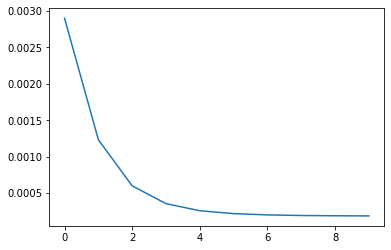

In [18]:
c=list(range(0,500,5))#生成有序列表，0-495，步距5
c=random.shuffle(c)#打乱，得到乱序列表，用于随机取值
rate=0.005
loss_list=[]
def grad_cal(i):#计算梯度，每次计算一个
    x_0=x[:,i].reshape((-1,1)) #将x进行随机切片，得到3*1矩阵
    y_0=y[:,i].reshape((-1,1)) #同时将x,y设置为向量，3维向量和1维矩阵
    b_grad=(torch.mm(w_hat.T,x_0)+b_hat-y_0)#此时b是1*1矩阵
    w_grad=x_0*b_grad#此时x_0是3*1，b_grad是1*1，直接相乘可以得到3*1
    return w_grad,b_grad
epochs=[1,2,3,4,5,6,7,8,9,10]
print(loss().sum()/500)
for epoch in epochs:#多轮学习
    for i in range(0,500,5):#每轮里面每次从一些样本里面学习
        w_1,b_1=grad_cal(i)
        w_2,b_2=grad_cal(i+1)
        w_3,b_3=grad_cal(i+2)
        w_4,b_4=grad_cal(i+3)
        w_5,b_5=grad_cal(i+4)
        w_hat-=rate*(w_1+w_2+w_3+w_4+w_5)/5.0
        b_hat-=rate*(b_1+b_2+b_3+b_4+b_5)/5.0
    loss_list.append(loss().sum()/500)
    print(loss().sum()/500)
loss_array=np.array(loss_list)
xx=np.arange(0,10)
plt.plot(xx,loss_array)
print(w_hat,b_hat)